# **Practical NLP Applications: Text Mining, Spam Detection, and Sentiment Analysis**

## **Project 1: Preprocessing Demo**

In [ ]:
import nltk

# List of required NLTK resources
resources = ['punkt', 'stopwords', 'wordnet']

for resource in resources:
    try:
        nltk.data.find(f'{resource}')
    except LookupError:
        nltk.download(resource)


# Example text
text = "Our customer service received 3 complaints today. However, 25 users gave positive feedback!"

# 1. Sentence & Word Tokenization
print(sent_tokenize(text))
print(word_tokenize(text))

# 2. Remove Stopwords
stop_words = set(stopwords.words('english'))
filtered = [w for w in word_tokenize(text) if w.lower() not in stop_words]
print("Without stopwords:", filtered)

# 3. Remove Punctuation
no_punct = [w for w in filtered if w not in string.punctuation]
print("Without punctuation:", no_punct)

# 4. Remove Numbers
no_numbers = [w for w in no_punct if not w.isdigit()]
print("Without numbers:", no_numbers)

# 5. Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed = [stemmer.stem(w) for w in no_numbers]
print("Stemmed:", stemmed)

# 6. Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(w) for w in no_numbers]
print("Lemmatized:", lemmatized)

['Our customer service received 3 complaints today.', 'However, 25 users gave positive feedback!']
['Our', 'customer', 'service', 'received', '3', 'complaints', 'today', '.', 'However', ',', '25', 'users', 'gave', 'positive', 'feedback', '!']
Without stopwords: ['customer', 'service', 'received', '3', 'complaints', 'today', '.', 'However', ',', '25', 'users', 'gave', 'positive', 'feedback', '!']
Without punctuation: ['customer', 'service', 'received', '3', 'complaints', 'today', 'However', '25', 'users', 'gave', 'positive', 'feedback']
Without numbers: ['customer', 'service', 'received', 'complaints', 'today', 'However', 'users', 'gave', 'positive', 'feedback']
Stemmed: ['custom', 'servic', 'receiv', 'complaint', 'today', 'howev', 'user', 'gave', 'posit', 'feedback']
Lemmatized: ['customer', 'service', 'received', 'complaint', 'today', 'However', 'user', 'gave', 'positive', 'feedback']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!




---



## **Project 2: Clustering Demo (Unsupervised)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Documents
docs = [
    "The sales team achieved a record profit this quarter.",
    "Customer satisfaction has increased after the new support system.",
    "The new AI tool is improving data processing efficiency.",
    "Marketing campaigns boosted online engagement by 30 percent.",
    "We received excellent feedback from enterprise clients."
]

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(docs)

# Cluster with KMeans
k = 2
model = KMeans(n_clusters=k, random_state=42)
model.fit(X)

# Show cluster keywords
terms = vectorizer.get_feature_names_out()
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

for i in range(k):
    print("Cluster", i)
    for idx in order_centroids[i, :10]:
        print(" ", terms[idx])
    print()

# Predict cluster of new text
new_text = ["chrome browser to open"]
y = vectorizer.transform(new_text)
print("Prediction:", model.predict(y))


Cluster 0
  new
  satisfaction
  support
  customer
  increased
  profit
  record
  quarter
  team
  sales

Cluster 1
  received
  clients
  enterprise
  excellent
  feedback
  sales
  record
  quarter
  profit
  team

Prediction: [0]




---



## **Project 3: SMS Spam Classification (Supervised)**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import string, nltk

# Load dataset
url = "https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv"
data = pd.read_csv(url, encoding="ISO-8859-1")[['v1','v2']]
print(data.head())

# Encode labels (spam=1, ham=0)
le = LabelEncoder()
y = le.fit_transform(data['v1'])

# Preprocessing function: remove punctuation
def remove_punctuation(text):
    return "".join([c for c in text if c not in string.punctuation])

data['clean_text'] = data['v2'].apply(remove_punctuation)

# TF-IDF Features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['clean_text'])

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Neural Network
model = MLPClassifier(hidden_layer_sizes=100, max_iter=200, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Test with new input
new_text = ["Ok lar... Joking wif u oni"]
y_new = vectorizer.transform(new_text)
print("Prediction:", model.predict(y_new))  # 0 = ham, 1 = spam


     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Accuracy: 0.979372197309417
Prediction: [0]




---



## **Project 4: Sentiment Analysis**

### **A. Using TextBlob**

In [ ]:
from textblob import TextBlob

text = "The product quality exceeded my expectations and delivery was fast!"
blob = TextBlob(text)

print("Polarity:", blob.sentiment.polarity)
if blob.sentiment.polarity > 0:
    print("Positive")
elif blob.sentiment.polarity == 0:
    print("Neutral")
else:
    print("Negative")


Polarity: 0.25
Positive


### **B. Using VADER**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00
Sentiment Distribution:
Positive: 6
Negative: 5
Neutral: 1


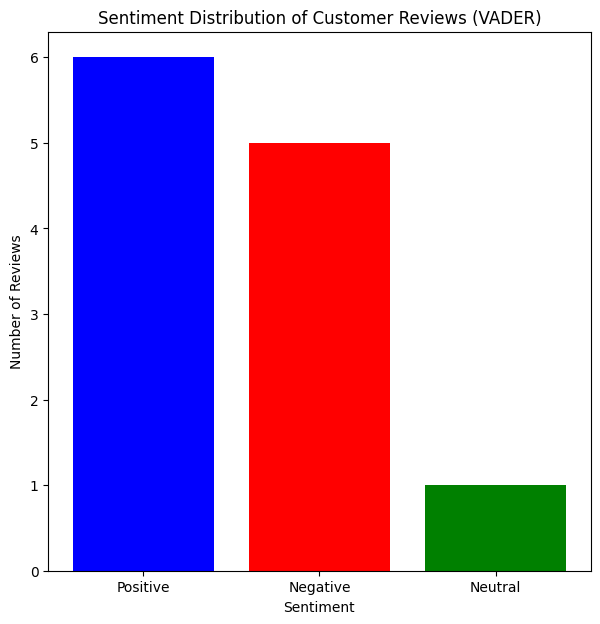

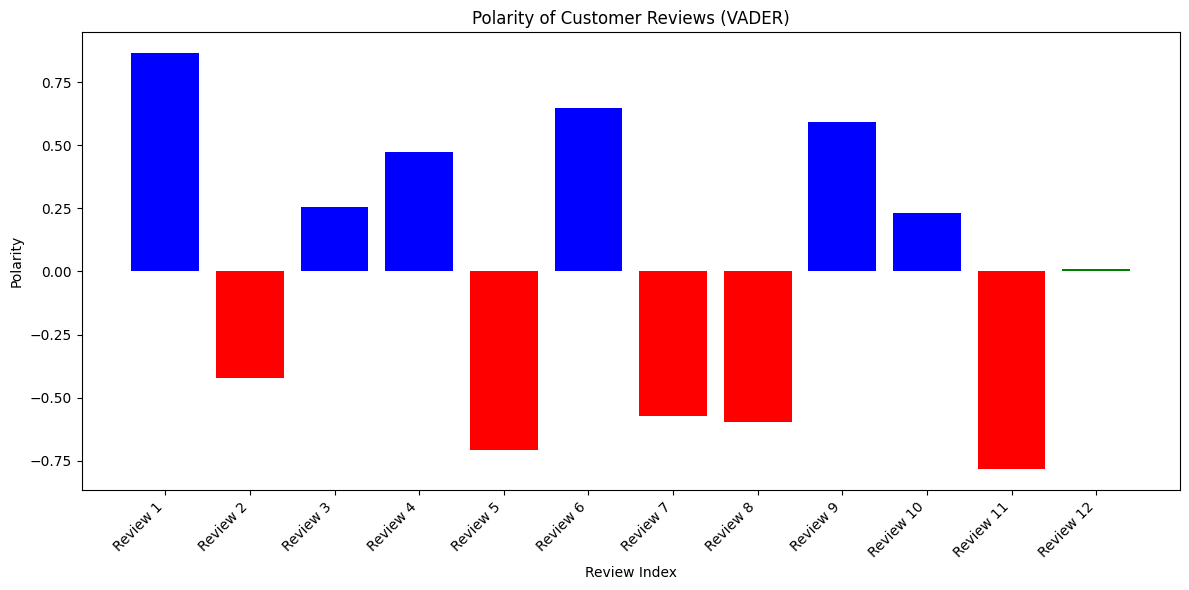

In [1]:
# Install necessary libraries
!pip install vaderSentiment matplotlib

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

# Sample customer reviews
customer_reviews = [
    "I absolutely love this product! It works wonderfully.",
    "The product quality is terrible. I want a refund.",
    "This is an okay product, nothing special but works fine.",
    "I’m very satisfied with my purchase. It exceeded my expectations.",
    "I regret buying this. It's completely useless.",
    "The item is okay for the price, but there are better options.",
    "Service was fine, but I’m not sure I’d recommend it.",
    "The product does its job, but it’s not particularly impressive.",
    "Delivery was on time, but the packaging could’ve been better.",
    "It’s an average product, not bad but nothing exceptional either.",
    "Worst purchase I’ve ever made. Complete waste of money.",
    "I am neutral"
]

# Function to perform sentiment analysis with VADER
def analyze_sentiment_vader(review):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    compound_score = scores['compound']

    # Classify sentiment based on compound score
    if compound_score >= 0.05:
        sentiment = "Positive"
    elif compound_score <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return sentiment, compound_score

# Initialize polarities as a list
polarities = []

# Initialize sentiment counts
sentiments = {'Positive': 0, 'Negative': 0, 'Neutral': 0}

# Initialize list to store sentiment colors for polarity plot
sentiment_colors_for_polarity = []

# Analyzing sentiment for each review
for review in customer_reviews:
    sentiment, polarity = analyze_sentiment_vader(review)
    sentiments[sentiment] += 1
    polarities.append(polarity)

    # Assign color based on sentiment
    if sentiment == "Positive":
        sentiment_colors_for_polarity.append('blue')
    elif sentiment == "Negative":
        sentiment_colors_for_polarity.append('red')
    else:
        sentiment_colors_for_polarity.append('green')

# Print sentiment distribution
print("Sentiment Distribution:")
print(f"Positive: {sentiments['Positive']}")
print(f"Negative: {sentiments['Negative']}")
print(f"Neutral: {sentiments['Neutral']}")

# Bar chart for sentiment distribution
labels = list(sentiments.keys())
sizes = list(sentiments.values())
colors = ['blue', 'red', 'green']  # Assigning colors for Positive, Negative, and Neutral

plt.figure(figsize=(7, 7))
bars = plt.bar(labels, sizes, color=colors)  # Bar chart with assigned colors
plt.title("Sentiment Distribution of Customer Reviews (VADER)")
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Visualization: Bar chart for polarity scores of each review with colors
plt.figure(figsize=(12, 6))

# Adjust polarities to ensure 0 values are slightly visible
adjusted_polarities = [p if p != 0 else 0.01 for p in polarities]  # Replace 0 with 0.01

plt.bar(range(len(customer_reviews)), adjusted_polarities, color=sentiment_colors_for_polarity)  # Use assigned colors
plt.title("Polarity of Customer Reviews (VADER)")
plt.xlabel('Review Index')
plt.ylabel('Polarity')
plt.xticks(range(len(customer_reviews)), [f"Review {i+1}" for i in range(len(customer_reviews))], rotation=45, ha='right')
plt.tight_layout()
plt.show()
